# Chinese NLP Toolbox Evaluation

# THULAC
THULAC（THU Lexical Analyzer for Chinese）由清华大学自然语言处理与社会人文计算实验室研制推出的一套中文词法分析工具包，具有<b>中文分词和词性标注功能</b>

https://github.com/thunlp/THULAC-Python

支持 python, c++, java

In [1]:
import thulac 

In [172]:
thu1 = thulac.thulac()  #默认模式
#thu1 = thulac.thulac(seg_only=True)  #只进行分词，不进行词性标注
text = thu1.cut("欢迎科研人员、技术工程师、企事业单位与个人参与NLPIR平台的建设工作。", text=True)  #进行一句话分词
#text_list = thu1.cut("我爱北京天安门", text=False)  #进行一句话分词
print(text)

Model loaded succeed
欢迎_v 科研_n 人员_n 、_w 技术_n 工程师_n 、_w 企事业_n 单位_n 与_p 个人_n 参与_v NLPIR_x 平台_n 的_u 建设_v 工作_v 。_w


# NLPIR-ICTCLAS
- use PyNLPIR A Python wrapper around the NLPIR/ICTCLASA 
- <b>分词，词性标注，关键词抽取</b>

In [171]:
import pynlpir
pynlpir.open()

s = '欢迎科研人员、技术工程师、企事业单位与个人参与NLPIR平台的建设工作。'
pynlpir.segment(s)
#print(pynlpir.segment(s, pos_tagging=False))
termlist = pynlpir.segment(s, pos_tagging=True)
termlist2 = []
for word,nature in termlist:
    termlist2.append('_'.join([word,nature]))
print(' '.join(termlist2))
pynlpir.close()

欢迎_verb 科研_noun 人员_noun 、_punctuation mark 技术_noun 工程师_noun 、_punctuation mark 企事业_noun 单位_noun 与_conjunction 个人_noun 参与_verb NLPIR_noun 平台_noun 的_particle 建设_verb 工作_verb 。_punctuation mark


In [183]:
import pynlpir
pynlpir.open()

topK = 10
s = '重庆晚报6月11日报道  昨日，市政府公众信息网发布消息称，经2010年5月13日市政府第70次常务会议通过，给予文强、陈洪刚二人行政开除处分。\n今年4月14日，市第五中级人民法院以受贿罪，包庇、纵容黑社会性质组织罪，巨额财产来源不明罪，强奸罪数罪并罚判处文强死刑，剥夺政治权利终身，并处没收个人全部财产。5月21日，市高级人民法院对文强案二审宣判，依法驳回文强上诉，维持一审的死刑判决。\n2月25日，市公安局交警总队原总队长陈洪刚受贿案在市第五中级人民法院一审宣判。陈洪刚因犯受贿，包庇、纵容黑社会性质组织，巨额财产来源不明，伪造居民身份证罪，数罪并罚，被判处有期徒刑20年，没收个人财产40万元人民币，追缴赃款326万余元及不明来源财产584万余元。记者 李伟\n'
keywordList = pynlpir.get_key_words(s, weighted=False)
pynlpir.close()

print(','.join(keywordList[:topK]))

文强,陈洪刚,财产,市政府,判处,死刑,没收,人民法院,宣判,来源


# jieba
- 基于前缀词典实现高效的词图扫描，生成句子中汉字所有可能成词情况所构成的有向无环图 (DAG)

- 采用了动态规划查找最大概率路径, 找出基于词频的最大切分组合

- 对于未登录词，采用了基于汉字成词能力的 HMM 模型，使用了 Viterbi 算法
- <b>分词，词性标注，关键词抽取</b>

In [174]:
import jieba

seg_list = jieba.cut("欢迎科研人员、技术工程师、企事业单位与个人参与NLPIR平台的建设工作。", cut_all=False)
print("Default Mode: " + " ".join(seg_list))  # 精确模式

Default Mode: 欢迎 科研人员 、 技术 工程师 、 企事业 单位 与 个人 参与 NLPIR 平台 的 建设 工作 。


In [175]:
import jieba.posseg as pseg

words = pseg.cut("欢迎科研人员、技术工程师、企事业单位与个人参与NLPIR平台的建设工作。")
result = []
for word, flag in words:
    result.append(word + '＿' +flag)
print(' '.join(result))

欢迎＿v 科研人员＿n 、＿x 技术＿n 工程师＿n 、＿x 企事业＿n 单位＿n 与＿p 个人＿n 参与＿v NLPIR＿eng 平台＿n 的＿uj 建设＿vn 工作＿vn 。＿x


In [178]:
import jieba.analyse

#'基于 TF-IDF 算法的关键词抽取'
content = '重庆晚报6月11日报道  昨日，市政府公众信息网发布消息称，经2010年5月13日市政府第70次常务会议通过，给予文强、陈洪刚二人行政开除处分。\n今年4月14日，市第五中级人民法院以受贿罪，包庇、纵容黑社会性质组织罪，巨额财产来源不明罪，强奸罪数罪并罚判处文强死刑，剥夺政治权利终身，并处没收个人全部财产。5月21日，市高级人民法院对文强案二审宣判，依法驳回文强上诉，维持一审的死刑判决。\n2月25日，市公安局交警总队原总队长陈洪刚受贿案在市第五中级人民法院一审宣判。陈洪刚因犯受贿，包庇、纵容黑社会性质组织，巨额财产来源不明，伪造居民身份证罪，数罪并罚，被判处有期徒刑20年，没收个人财产40万元人民币，追缴赃款326万余元及不明来源财产584万余元。记者 李伟\n'
topK = 10
tags_tfidf = jieba.analyse.extract_tags(content, topK=topK, withWeight = False)
tags_textrank = jieba.analyse.textrank(content, topK=topK, withWeight = False)

print('\033[93m' + "Key Phrase Extraction Using TFIDF: " + '\033[0m' + ",".join(tags_tfidf))
print('\033[93m' + "Key Phrase Extraction Using TextRank: " + '\033[0m' + ",".join(tags_textrank))

Key Phrase Extraction Using TFIDF: 文强,陈洪刚,巨额财产,来源不明,数罪并罚,包庇,一审,万余元,宣判,黑社会
Key Phrase Extraction Using TextRank: 财产,性质,来源不明,死刑,纵容,没收,市政府,巨额财产,数罪并罚,包庇


# HanLP (java)
- 中文分词
- 词性标注
- 实体识别
- 关键词提取
- 自动摘要
- 短语提取
- 拼音转换
- 简繁转换
- 文本推荐
- 依存句法分析
- 语料库工具

# ANSJ (java)
- 这是一个基于n-Gram+CRF+HMM的中文分词的java实现。
- 分词速度达到每秒钟大约200万字左右（mac air下测试），准确率能达到96%以上
- 目前实现了：<b>中文分词、关键字提取、自动摘要、关键字标记等功能</b>
- 可以应用到自然语言处理等方面，适用于对分词效果要求高的各种项目.
- 近1年内有更新维护，更新活跃

# FudanNLP (java)
- 信息检索： **文本分类 新闻聚类**
- 中文处理： **中文分词 词性标注 实体名识别 关键词抽取 依存句法分析 时间短语识别**
- 结构化学习： **在线学习 层次分类 聚类**

# THUTAG (java)
 - A Package of **Kephrase Extraction and Social Tag Suggetion**

# 哈工大LTP
- originally written in C++. provide interface for Python and Java
- Segmentation with customed lexicon

In [7]:
# Segmentation 分词
from pyltp import Segmentor
segmentor = Segmentor()
segmentor.load("/home/user/Python_notebooks/chinese_nlp/ltp-cws/ltp_data_v3.4.0/cws.model")
words = segmentor.segment("元芳你怎么看")
print(" ".join(words))
segmentor.release()

元芳 你 怎么 看


In [2]:
# POS Tagging 词性标注
# -*- coding: utf-8 -*-
from pyltp import Postagger
postagger = Postagger() # 初始化实例
postagger.load("/home/user/Python_notebooks/chinese_nlp/ltp-cws/ltp_data_v3.4.0/pos.model")  # 加载模型

words = ['元芳','你','怎么','看']
postags = postagger.postag(words)  # 词性标注

result = []
for word,pos in zip(words,postags):
    result.append(word + '_' + pos)
print(' '.join(result))
postagger.release()  # 释放模型

元芳_nh 你_r 怎么_r 看_v


In [29]:
# Named Entity Recognition 命名实体识别
# 人名，机构名，地名
# -*- coding: utf-8 -*-
from pyltp import NamedEntityRecognizer
recognizer = NamedEntityRecognizer() # 初始化实例
recognizer.load("/home/user/Python_notebooks/chinese_nlp/ltp-cws/ltp_data_v3.4.0/ner.model")  # 加载模型

words = ['元芳', '你', '怎么', '看']
postags = ['nh', 'r', 'r', 'v']
netags = recognizer.recognize(words, postags)  # 命名实体识别

result = []
for word, netag in zip(words,netags):
    result.append(word+"_"+netag)
print(' '.join(result))
recognizer.release()  # 释放模型

元芳_S-Nh 你_O 怎么_O 看_O


# FoolNLTK
- 可能不是最快的开源中文分词，但很可能是最准的开源中文分词
- 基于BiLSTM模型训练而成
- 包含分词，词性标注，实体识别,　都有比较高的准确率
- 用户自定义词典

In [2]:
# segmentation
import fool

text = "一个傻子在北京"
print(fool.cut(text))

starting load model 
loaded model cost : 7.234416s


['一个', '傻子', '在', '北京']


In [3]:
# pos tagging
import fool

text = "一个傻子在北京"
print(fool.pos_cut(text))
#[('一个', 'm'), ('傻子', 'n'), ('在', 'p'), ('北京', 'ns')]

[('一个', 'm'), ('傻子', 'n'), ('在', 'p'), ('北京', 'ns')]


In [4]:
# NER
import fool 

text = "一个傻子在北京"
words, ners = fool.analysis(text)
print(ners)
#[(5, 8, 'location', '北京')]

[(5, 8, 'location', '北京')]


# Performance Comparison

## Segmentation
Second International Chinese Word Segmentation Bakeoff data contains:

- CKIP, Academia Sinica, Taiwan (604KB, traditional chinese)

- City University of Hong Kong, Hong Kong SAR (197KB, traditional chinese)

- Beijing Universty, China (498KB)

- Microsoft Research, China (548KB)

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
import pandas as pd

score = pd.read_csv('icwb2-result/segmentation_comparison.csv')

<IPython.core.display.Javascript object>


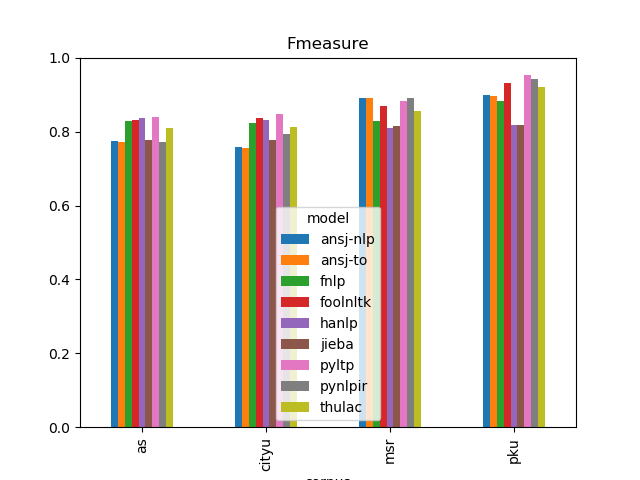

Text(0.5,1,'Fmeasure')

In [7]:
score2 = score.pivot(index='corpus', columns='model', values='fmeasure')
score2.plot.bar();
plt.title("Fmeasure")

<IPython.core.display.Javascript object>


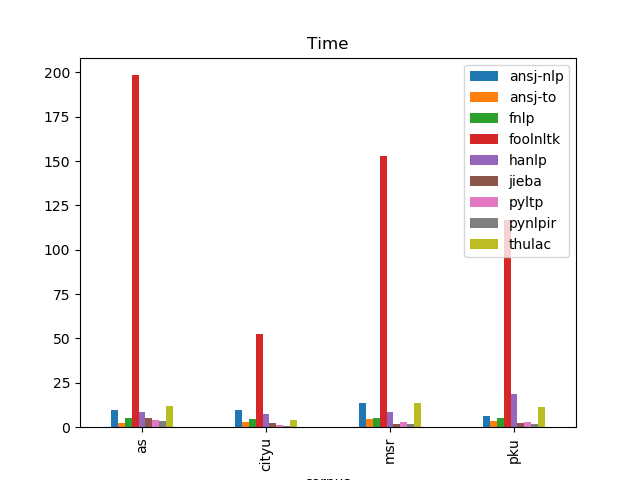

In [9]:
score2 = score.pivot(index='corpus', columns='model', values='time')
score2.plot.bar();
plt.title("Time")
plt.legend(loc='best')

## summary
- pyltp wins.

## POS tagging
**Dataset**:基于哈工大的”词性-词义_合并结果.txt”

**测试方法**: 对于每一行，评测分词结果相同的term总数累加为total，词性准确的term总数累加为correct， 最后通过correct/total计算词性识别的准确性

- find the natures computed by all models and ground truth
- find the intersection of the natures
- only consider these intersection when calculating pos accuracy

<caption><center>**Accuracy of various POS tagging models**</center></caption>
<img src="hit-result/pos_comparison.png" style="width:600px;height:300px;">

## Key Phrase Extraction

### Input:

重庆晚报6月11日报道  昨日，市政府公众信息网发布消息称，经2010年5月13日市政府第70次常务会议通过，给予文强、陈洪刚二人行政开除处分。今年4月14日，市第五中级人民法院以受贿罪，包庇、纵容黑社会性质组织罪，巨额财产来源不明罪，强奸罪数罪并罚判处文强死刑，剥夺政治权利终身，并处没收个人全部财产。5月21日，市高级人民法院对文强案二审宣判，依法驳回文强上诉，维持一审的死刑判决。2月25日，市公安局交警总队原总队长陈洪刚受贿案在市第五中级人民法院一审宣判。陈洪刚因犯受贿，包庇、纵容黑社会性质组织，巨额财产来源不明，伪造居民身份证罪，数罪并罚，被判处有期徒刑20年，没收个人财产40万元人民币，追缴赃款326万余元及不明来源财产584万余元。记者 李伟


### Output:

- <b>HanLP (textrank)</b>: 文强,没收,陈洪刚,财产,死刑,宣判,五中,包庇,判处,人民法院
- <b>jieba-tfidf</b>: 文强,陈洪刚,巨额财产,来源不明,数罪并罚,包庇,一审,万余元,宣判,黑社会
- <b>jieba-textrank</b>: 财产,性质,来源不明,死刑,纵容,没收,市政府,巨额财产,数罪并罚,包庇
- <b>NLPIR/ICTCLAS</b>: 文强,陈洪刚,财产,市政府,判处,死刑,没收,人民法院,宣判,来源
- <b>ANSJ (tfidf)</b>: 文强,人民法院,陈洪刚,中级,巨额,常务,昨日,二审,一审,重庆
- <b>THUTAG - WAM</b>: 死刑,交警,身份证,一审,开除,宣判,伪造,财产,受贿,没收
- <b>THUTAG - ExpandRank</b>: 市政府,没收,财产,死刑,宣判,财产来源不明,一审,巨额,总队,组织
- <b>THUTAG - TFIDF</b>: 洪刚,财产来源不明,包庇,黑社会性质,纵容 
- <b>THUTAG - TextPageRank</b>: 洪刚,市政府,没收,财产,死刑,宣判,财产来源不明,一审,巨额,第五 
- <b>THUTAG - TopicPageRank</b>: 万元,死刑,洪刚,没收,一审,人民法院,宣判,财产,中级,总队
- <b>fnlp</b>: 市,财产,法院,文强,罪,陈洪刚,来源,元,没收,判处

### Evaluation
**Dataset**: The KeywordPost.dot is from NetEase News, which can be used for keyphrase extraction algorithm. Downloaded from THUTAG project (https://github.com/thunlp/THUTag)
<caption><center>**Recall score of various models**</center></caption>
<img src="keyphrase_evaluation/KeyphraseExtraction.png" style="width:650px;height:300px;">

In [209]:
# split KeywordPost.dat to train(70%) and test(30%) 
import simplejson as json
train_prop = 0.7

with open('/home/user/Python_notebooks/chinese_nlp/THUTag/traindata/KeywordPost.dat', 'r') as content_file:
    content = content_file.readlines()
    
n_train = int(len(content)*train_prop)
n_test = len(content) - n_train

content_train = content[0:n_train]
with open('/home/user/Python_notebooks/chinese_nlp/THUTag/traindata/KeywordPost_train.dat', 'w') as train_file:
    for line in content_train:
        train_file.write(line)

content_test = content[n_train:]
passages = []
tags = []
for line in content_test:
    record = json.loads(line)
    passages.append(record['content'].replace('\n',''))
    tags.append(','.join(record['tags']))
with open('/home/user/Python_notebooks/chinese_nlp/THUTag/traindata/KeywordPost_test.dat', 'w') as test_file:
    for passage in passages:
        test_file.write(passage + '\n')
with open('/home/user/Python_notebooks/chinese_nlp/THUTag/traindata/KeywordPost_gold.dat', 'w') as gold_file:
    for tag in tags:
        gold_file.write(tag + '\n')

In [88]:
# convert input file. remove pos tagging
lines = [line.rstrip('\n') for line in open("hit-data/"+cor+".utf8",encoding='utf-8')]

with codecs.open("hit-data/data_no_term.utf8", "w", "utf-8") as temp:
    tic = time.time()
    for line in lines:
        sen = ''
        for item in line.split(' '):
            sen = sen + item.split('/')[0]
        temp.write(sen + "\n")
    toc = time.time()
    print(cor + ": " + str(toc-tic) + "s")

data: 0.6879773139953613s


In [11]:
from collections import defaultdict

def getNatures(model,model_split,isgt):
    if isgt:
        resfile = 'hit-result/'+model+'.utf8'
    else:
        resfile = 'hit-result/data_'+model+'_result.utf8'
    res = [line.rstrip('\n') for line in open(resfile,encoding='utf-8')]

    natures = defaultdict(lambda:0)
    for line in res:
        for item in line.split(' '):
            if len(item.split(model_split)) < 2:
                continue
            nature = item.split(model_split)[1]
            natures[nature] += 1
    return natures

In [12]:
natures = [set(getNatures('data','/', True).keys()), set(getNatures('thulac','_', False).keys()), set(getNatures('jieba','/', False).keys()), set(getNatures('ansj-to','/', False).keys()), set(getNatures('ansj-nlp','/', False).keys()), set(getNatures('hanlp','/', False).keys())]
natures_set = set.intersection(*natures)
considered_natures = list(natures_set)
print(considered_natures)

['v', 'p', 'q', 'a', 'd', 'o', 'u', 'j', 'k', 'n', 'e', 'i', 'c', 'ns', 'm', 'r', 'nz']


In [226]:
## hashtable for english/chinese POS tagger
posLookup = {'形容词':'a', '量词':'q', '成语':'i', '名词':'n', '副词':'d', '助词':'u', '其他专名':'nz', '连词':'c', '叹词':'e', '介词':'p', '拟声词':'o', '动词':'v', '地名':'ns', '代词':'r', '后接成分':'k', '简称略语':'j', '数词':'m' }

In [13]:
# calculate pos accuracy
# need considered_nature as input

resfile = 'hit-result/data_foolnltk_result.utf8'
gtfile = 'hit-data/data.utf8'
res_split = '/'
gt = [line.rstrip('\n') for line in open(gtfile,encoding='utf-8')]
res = [line.rstrip('\n') for line in open(resfile,encoding='utf-8')]

assert(len(gt) == len(res))

gt_dics = []
for line in gt:
    gt_dic = {}
    for item in line.split(' '):
        if len(item.split('/')) < 2:
            continue
        word = item.split('/')[0]
        nature = item.split('/')[1]
        if nature not in considered_natures:
            continue
        gt_dic[word] = nature
    gt_dics.append(gt_dic)


idx = 0
accuracies = 0
for line in res:
    res_dic = {}
    for item in line.split(' '):
        if len(item.split(res_split)) < 2:
            continue
        word = item.split(res_split)[0]
        nature = item.split(res_split)[1]
        if nature not in considered_natures:
            continue
        #nature_chn = item.split(res_split)[1]
        #if nature_chn not in posLookup:
            #continue
        #nature = posLookup[nature_chn]
        res_dic[word] = nature
    gt_dic = gt_dics[idx]
    common_words = list(set(gt_dic.keys()) & set(res_dic.keys()))
    total = len(common_words)
    correct = 0
    for word in common_words:
        if gt_dic[word] == res_dic[word]:
            correct = correct + 1
    if total == 0:
        accuracy = 0
    else:
        accuracy = correct/total
    accuracies = accuracies + accuracy
    idx = idx + 1
    
ave_acc = accuracies/len(gt)
print(ave_acc)

0.9495162865732656


In [19]:
corpus = ['pku','msr','cityu','as']

In [85]:
# thulac segmentation
import thulac 
import time
from hanziconv import HanziConv
import codecs

corpus = ['data']
thu1 = thulac.thulac()  #只进行分词，不进行词性标注
for cor in corpus:
    print("processing: "+cor)
    #tic = time.time()
    #thu1.cut_f("hit-data/"+cor+".utf8", "hit-result/"+cor+"thulac_result.utf8")  #对input.txt文件内容进行分词，输出到output.txt
    #toc = time.time()
    #print(cor + ": " + str(toc-tic))
    lines = [line.rstrip('\n') for line in open("hit-data/"+cor+".utf8",encoding='utf-8')]

    with codecs.open("hit-result/"+cor+"_thulac_result.utf8", "w", "utf-8") as temp:
        tic = time.time()
        for line in lines:
            sen = ''
            for item in line.split(' '):
                sen = sen + item.split('/')[0]
            output = thu1.cut(sen, text=True)
            temp.write(output + "\n")
        toc = time.time()
        print(cor + ": " + str(toc-tic) + "s")


Model loaded succeed
processing: data
data: 794.6688413619995s


In [27]:
#pynlpir segmentation
import codecs
import time
from hanziconv import HanziConv
import pynlpir
pynlpir.open()

corpus = ['cityu','as']
for cor in corpus:
    print("processing: "+cor)
    lines = [line.rstrip('\n') for line in open("icwb2-data/testing/"+cor+"_test.utf8",encoding='utf-8-sig')]

    with codecs.open("icwb2-result/pynlpir/"+cor+"_result.utf8", "w", "utf-8-sig") as temp:
        tic = time.time()
        for line in lines:
            output = ' '.join(pynlpir.segment(HanziConv.toSimplified(line), pos_tagging=False))
            temp.write(HanziConv.toTraditional(output) + "\n")
        toc = time.time()
        print(cor + ": " + str(toc-tic) + "s")
pynlpir.close()

processing: cityu
cityu: 0.8141064643859863s
processing: as
as: 3.844552993774414s


In [29]:
# jieba segmentation
import codecs
import time
import jieba
from hanziconv import HanziConv

corpus = ['pku','msr','cityu','as']
for cor in corpus:
    print("processing: "+cor)
    lines = [line.rstrip('\n') for line in open("icwb2-data/testing/"+cor+"_test.utf8",encoding='utf-8-sig')]

    with codecs.open("icwb2-result/jieba/"+cor+"_result.utf8", "w", "utf-8-sig") as temp:
        tic = time.time()
        for line in lines:
            #chinese simplified
            output = ' '.join(jieba.cut(line, cut_all=False))
            temp.write(output + "\n")
            # chinese traditional
            #output = ' '.join(jieba.cut(HanziConv.toSimplified(line), cut_all=False))
            #temp.write(HanziConv.toTraditional(output) + "\n")
        toc = time.time()
        print(cor + ": " + str(toc-tic) + "s")

processing: pku
pku: 2.3109629154205322s
processing: msr
msr: 1.857112169265747s
processing: cityu
cityu: 2.1407041549682617s
processing: as
as: 5.4070045948028564s


In [8]:
# pyltp segmentation
import codecs
import time
from pyltp import Segmentor
segmentor = Segmentor()
segmentor.load("/home/user/Python_notebooks/chinese_nlp/ltp-cws/ltp_data_v3.4.0/cws.model")

corpus = ['pku','msr','cityu_sim','as_sim']
for cor in corpus:
    print("processing: "+cor)
    lines = [line.rstrip('\n') for line in open("icwb2-data/testing/"+cor+"_test.utf8",encoding='utf-8-sig')]

    with codecs.open("icwb2-result/pyltp/"+cor+"_result.utf8", "w", "utf-8-sig") as temp:
        tic = time.time()
        for line in lines:
            output = ' '.join(segmentor.segment(line))
            temp.write(output + "\n")
        toc = time.time()
        print(cor + ": " + str(toc-tic) + "s")
segmentor.release()

processing: pku
pku: 2.9039928913116455s
processing: msr
msr: 2.8768677711486816s
processing: cityu_sim
cityu_sim: 0.9735040664672852s
processing: as_sim
as_sim: 4.029304027557373s


In [6]:
# foolnltk segmentation
import codecs
import time
import fool

corpus = ['pku','msr','cityu_sim','as_sim']
for cor in corpus:
    print("processing: "+cor)
    lines = [line.rstrip('\n') for line in open("icwb2-data/testing/"+cor+"_test.utf8",encoding='utf-8-sig')]

    with codecs.open("icwb2-result/foolnltk/"+cor+"_result.utf8", "w", "utf-8-sig") as temp: ## write result to file
        tic = time.time()
        for line in lines:
            output = ' '.join(fool.cut(line))
            temp.write(output + "\n")
        toc = time.time()
        print(cor + ": " + str(toc-tic) + "s")


processing: pku
pku: 116.80364990234375s
processing: msr
msr: 152.60818099975586s
processing: cityu_sim
cityu_sim: 52.76371622085571s
processing: as_sim
as_sim: 198.38801193237305s


NameError: name 'segmentor' is not defined

In [89]:
## jieba pos
import codecs
import time
import jieba.posseg as pseg

corpus = ['data_no_term']
for cor in corpus:
    print("processing: "+cor)
    lines = [line.rstrip('\n') for line in open('hit-data/'+cor+'.utf8',encoding='utf-8')]

    with codecs.open("hit-result/"+cor+"_jieba_result.utf8", "w", "utf-8") as temp:
        tic = time.time()
        for line in lines:
            words = pseg.cut(line)
            result = []
            for word, flag in words:
                result.append(word + '/' +flag)
            output = ' '.join(result)
            temp.write(output + "\n")
        toc = time.time()
        print(cor + ": " + str(toc-tic) + "s")

processing: data
data: 28.596097469329834s


In [21]:
# pyltp pos
import codecs
import time
from pyltp import Postagger
postagger = Postagger() # 初始化实例
postagger.load("/home/user/Python_notebooks/chinese_nlp/ltp-cws/ltp_data_v3.4.0/pos.model")  # 加载模型

from pyltp import Segmentor
segmentor = Segmentor()
segmentor.load("/home/user/Python_notebooks/chinese_nlp/ltp-cws/ltp_data_v3.4.0/cws.model")

postags = postagger.postag(words)  # 词性标注

corpus = ['data_no_term']
model = 'pyltp'
for cor in corpus:
    print("processing: "+cor)
    lines = [line.rstrip('\n') for line in open('hit-data/'+cor+'.utf8',encoding='utf-8')]

    with codecs.open("hit-result/"+cor+"_"+model+"_result.utf8", "w", "utf-8") as temp:
        tic = time.time()
        for line in lines:
            words = list(segmentor.segment(line))
            postags = postagger.postag(words)
            result = []
            for word, flag in zip(words,postags):
                result.append(word + '/' +flag)
            output = ' '.join(result)
            temp.write(output + "\n")
        toc = time.time()
        print(cor + ": " + str(toc-tic) + "s")

processing: data_no_term
data_no_term: 16.43616771697998s


In [10]:
## foolnltk pos
import codecs
import time
import fool

corpus = ['data_no_term']
for cor in corpus:
    print("processing: "+cor)
    lines = [line.rstrip('\n') for line in open('hit-data/'+cor+'.utf8',encoding='utf-8')]

    with codecs.open("hit-result/"+cor+"_foolnltk_result.utf8", "w", "utf-8") as temp:
        tic = time.time()
        for line in lines:
            words = fool.pos_cut(line)
            result = []
            for word, flag in words:
                result.append(word + '/' +flag)
            output = ' '.join(result)
            temp.write(output + "\n")
        toc = time.time()
        print(cor + ": " + str(toc-tic) + "s")

processing: data_no_term
data_no_term: 503.15481066703796s


In [ ]:
# jieba keyphrase exraction
import codecs
import time
import jieba.analyse

article = '/home/user/Python_notebooks/chinese_nlp/keyphrase_evaluation/KeywordPost_test.dat'
output1 = '/home/user/Python_notebooks/chinese_nlp/keyphrase_evaluation/KeywordPost/jiebaTFIDF.utf8'
output2 = '/home/user/Python_notebooks/chinese_nlp/keyphrase_evaluation/KeywordPost/jiebaTextRank.utf8'
topK = 10

lines = [line.rstrip('\n') for line in open(article,encoding='utf-8')]

with codecs.open(output1, "w", "utf-8") as temp:
  tic = time.time()
  for line in lines:
    result = jieba.analyse.extract_tags(line, topK=topK, withWeight = False)
    temp.write(','.join(result) + "\n")
  toc = time.time()
  print(cor + ": " + str(toc-tic) + "s")
  
with codecs.open(output2, "w", "utf-8") as temp:
  tic = time.time()
  for line in lines:
    result = jieba.analyse.textrank(line, topK=topK, withWeight = False)
    temp.write(','.join(result) + "\n")
  toc = time.time()
  print(cor + ": " + str(toc-tic) + "s")

perl icwb2-data/scripts/score icwb2-data/gold/pku_training_words.utf8 icwb2-data/gold/pku_test_gold.utf8 icwb2-result/thulac/pku_result.utf8 > icwb2-result/score.utf8

In [3]:
## convert between chinese traditional file and chinese simplified file
import codecs
from hanziconv import HanziConv
def HanziConvToSimFile(infile,outfile):
    lines = [line.rstrip('\n') for line in open(infile,encoding='utf-8-sig')]
    with codecs.open(outfile, "w", "utf-8-sig") as temp:
        for line in lines:
            temp.write(HanziConv.toSimplified(line) + '\n')

def HanziConvToTraFile(infile,outfile):
    lines = [line.rstrip('\n') for line in open(infile,encoding='utf-8-sig')]
    with codecs.open(outfile, "w", "utf-8-sig") as temp:
        for line in lines:
            temp.write(HanziConv.toTraditional(line) + '\n')            

In [33]:
HanziConvToSimFile("icwb2-data/testing/cityu_test.utf8","icwb2-data/testing/cityu_sim_test.utf8")
HanziConvToSimFile("icwb2-data/testing/as_test.utf8","icwb2-data/testing/as_sim_test.utf8")

In [4]:
model = 'foolnltk'
HanziConvToTraFile("icwb2-result/"+model+"/cityu_sim_result.utf8","icwb2-result/"+model+"/cityu_result.utf8")
HanziConvToTraFile("icwb2-result/"+model+"/as_sim_result.utf8","icwb2-result/"+model+"/as_result.utf8")

In [2]:
import sys
print(sys.path)

['', '/home/user/anaconda3/lib/python36.zip', '/home/user/anaconda3/lib/python3.6', '/home/user/anaconda3/lib/python3.6/lib-dynload', '/home/user/anaconda3/lib/python3.6/site-packages', '/home/user/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/user/.ipython']
